# Youtube Trending Data: #2. 나라 별 자료 분석

In [3]:
import pandas as pd

__한국, 일본의 데이터를 불러온 뒤 country 변수 추가__

In [5]:
input_fd = open('KRvideos.csv',errors = 'backslashreplace',encoding='utf-8')
KR_videos = pd.read_csv(input_fd)

KR_videos['country']='Korea'

In [6]:
#KR_videos.head()

In [7]:
input_fd = open('JPvideos.csv', errors = 'backslashreplace',encoding='utf-8')
JP_videos = pd.read_csv(input_fd)

JP_videos['country']='Japan'

In [8]:
#JP_videos.head()

__한국과 일본의 데이터 병합__

In [9]:
df = pd.concat([KR_videos, JP_videos],sort=True)
#df.head()

__카테고리 변수 설명 들어있는 json파일 불러온 뒤 기존 df에 붙이기__

In [11]:
import json

id_to_category = {}

with open(r"C:\Users\Hyunjung\ESAA\과제\KR_category_id.json", 'r') as f:
    data = json.load(f)
    for category in data['items']:
        id_to_category[category['id']] = category['snippet']['title']

#id_to_category

In [12]:
df["category_id"] = df["category_id"].astype(str)
df.insert(4, "category", df["category_id"].map(id_to_category))

In [13]:
#df.head()

## 1. 전체 자료 수/자료 수 대비 조회수 비교

### 1-1. 나라 별 총 동영상 수

In [16]:
%matplotlib inline 
import matplotlib.pyplot as plt 
import seaborn as sns 

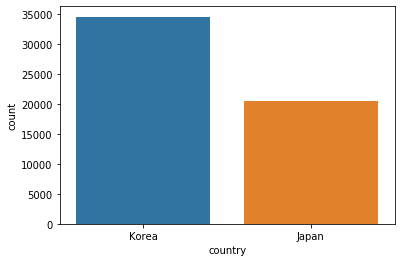

In [17]:
ax = plt.subplots() 
ax = sns.countplot('country', data=df) 

### 1-2. 나라 별 평균 조회수

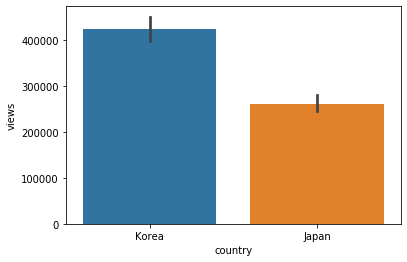

In [18]:
ax = plt.subplots() 
ax = sns.barplot(x='country', y='views', data=df)

__업로드한 동영상 수는 한국이 일본보다 많고 평균 조회수도 한국이 일본보다 높다.__

__한국 유튜브 사용자(채널 운영자+서비스 이용자)가 일본 유튜브 사용자보다 많다.__ 

### 1-3. 나라 별 조회수/자료수

In [19]:
print('한국:', sum(df[df['country']=="Korea"]['views'])/len(df[df['country']=="Korea"]))
print('일본:', sum(df[df['country']=="Japan"]['views'])/len(df[df['country']=="Japan"]))


#df_KR = df[df['country']=="Korea"]
#df_JP = df[df['country']=="Japan"]

#ax = plt.subplots() 
#ax = sns.barplot(x='country', y='ratio', data=df) 

한국: 424947.27089420543
일본: 262021.47005798374


__동영상 하나 당 조회수 또한 한국이 일본보다 잘 나온다.__

## 2. 카테고리 비교

### 2-1.  나라 별 카테고리 당 동영상 수

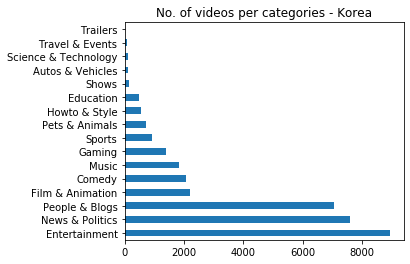

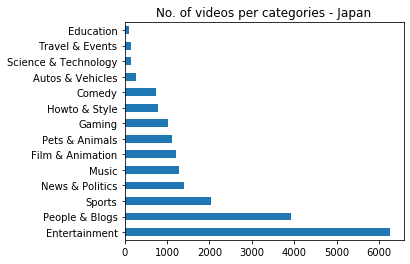

In [21]:
df_KR = df[df['country']=="Korea"]
df_JP = df[df['country']=="Japan"]

category_count_KR = df_KR['category'].value_counts()
category_count_JP = df_JP['category'].value_counts() 


plt.figure(1)
ax1 = category_count_KR.plot.barh(figsize=(5,4))

plt.figure(2)
ax2 = category_count_JP.plot.barh(figsize=(5,4))

ax1.set_title('No. of videos per categories - Korea')
ax2.set_title('No. of videos per categories - Japan')

plt.show()

__한국 top5: Entertainment -> News&Politics -> People&Blogs -> Film&Animation -> Comedy__

__일본 top5: Entertainment -> People&Blogs -> Sports -> News&Politics -> Music__

두 나라 모두 Entertainment 분야의 동영상이 가장 많다. 한국은 일본보다 비교적 News&Politics 분야의 컨텐츠가 많고 일본은 비교적 Sports 분야의 컨텐츠가 많다.

### 2-2. 나라 별 카테고리 당 조회수

Text(0.5, 1.0, 'View counts per categories - Japan')

<Figure size 432x288 with 0 Axes>

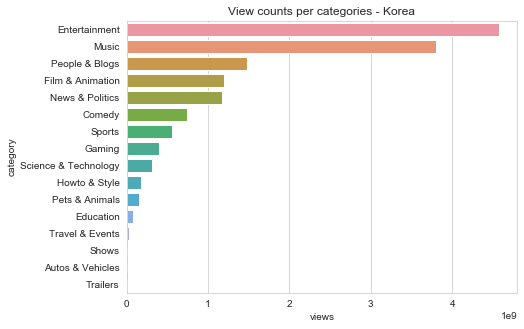

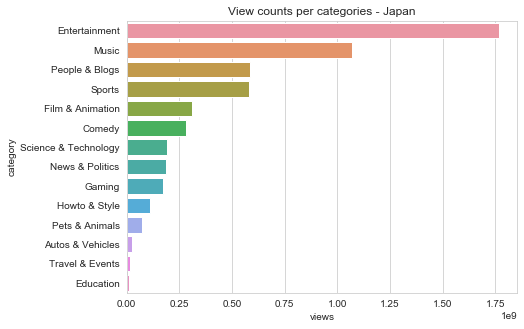

In [44]:
viewskr = df_KR.groupby('category')['views'].agg('sum')
viewskr = viewskr.sort_values(ascending=False).reset_index()

plt.figure(1)
viewskr.columns = ['category','views']
plt.subplots(figsize=(7, 5))
kr = sns.barplot(x="views", y="category", data=viewskr)
kr.set_title("View counts per categories - Korea") 


viewsjp = df_JP.groupby('category')['views'].agg('sum')
viewsjp = viewsjp.sort_values(ascending=False).reset_index()

plt.figure(2)
viewsjp.columns = ['category','views']
plt.subplots(figsize=(7, 5))
kr = sns.barplot(x="views", y="category", data=viewsjp)
kr.set_title("View counts per categories - Japan") 

__한국 top5: Entertainment -> Music -> People&Blogs -> Film&Animation -> Comedy__

__일본 top5: Entertainment -> Music -> People&Blogs -> Sports -> Film&Animation__

두 나라 모두 Entertainment 분야의 컨텐츠의 조회수가 가장 높다. 한국은 일본보다 비교적 Film&Animation 분야가 조회수가 잘나오고, 일본은 비교적 Sports 분야가 조회수가 잘나온다.

하지만 동영상 수에 비해 나라 별 편차는 적다. 특히 두 나라에서 모두 컨텐츠의 양에 비해 Music 분야의 동영상이 조회수가 높은 것을 확인할 수 있다.

__<아쉬운 점>__
- '이재정 더불어 민주당 의원 / 종북 몰이 전희경 / 걸크러쉬 이재정 / 주광덕 전희...	', '수년간 이어져 온 성심병원 간호사 장기자랑 논란. 성심병원 일부 간호사들이 재단 체...' 등이 Entertainment에 분류됨.

In [16]:
#df[df['category']=="Entertainment"].head(10)